In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Classificação

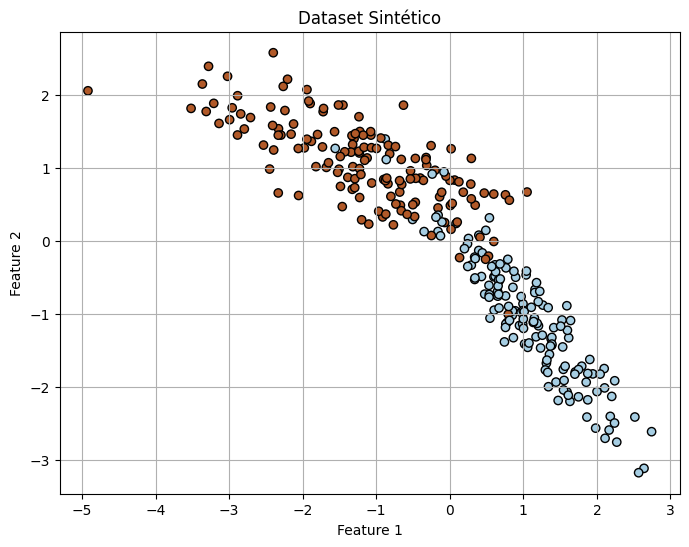

In [12]:
# Criar um dataset sintético
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=300, random_state=50)

# Visualizar o dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Sintético')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Fronteira de Decisão: Regressão Logística')

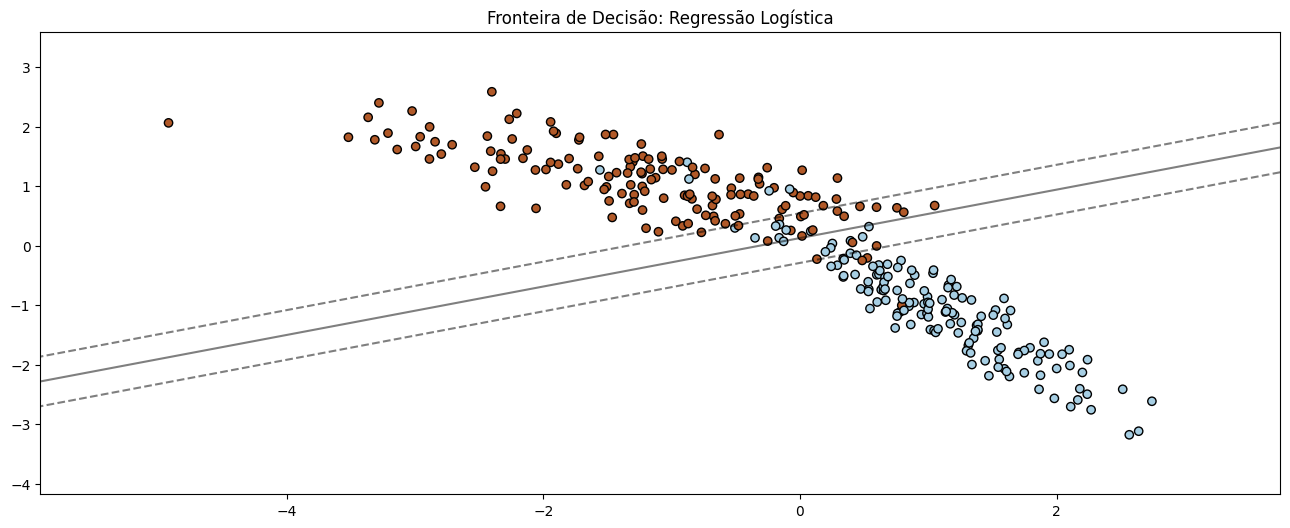

In [13]:


# Treinar e visualizar a fronteira de decisão

# Treinar um modelo de regressão logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X, y)

# 4. Visualizar as fronteiras de decisão estendidas

def extended_decision_boundary(model, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50)
    yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_xlim(xx[0], xx[-1])
    ax.set_ylim(yy[0], yy[-1])

plt.figure(figsize=(16, 6))
extended_decision_boundary(logreg, X, y)
plt.title('Fronteira de Decisão: Regressão Logística')
